In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from getdist import plots, MCSamples
from scipy.optimize import minimize
from scipy.special import erf

In [2]:
data_oldHz = np.array([
    [0.07, 69.0, 19.6],
    [0.09, 69.0, 12.0],
    [0.12, 68.6, 26.2],
    [0.17, 83.0, 8.0],
    [0.179, 75.0, 4.0],
    [0.199, 75.0, 5.0],
    [0.2, 72.9, 29.6],
    [0.27, 77.0, 14.0],
    [0.28, 88.8, 36.6],
    [0.352, 83.0, 14.0],
    [0.3802, 83.0, 13.5],
    [0.4, 95.0, 17.0],
    [0.4004, 77.0, 10.2],
    [0.4247, 87.1, 11.2],
    [0.43, 86.45, 3.68],
    [0.4497, 92.8, 12.9],
    [0.47, 89.0, 34.0],
    [0.4783, 80.9, 9.0],
    [0.48, 97.0, 62.0],
    [0.5929, 104.0, 13.0],
    [0.6797, 92.0, 8.0],
    [0.7812, 105.0, 12.0],
    [0.8754, 125.0, 17.0],
    [0.88, 90.0, 40.0],
    [0.9, 117.0, 23.0],
    [1.037, 154.0, 20.0],
    [1.3, 168.0, 17.0],
    [1.363, 160.0, 33.6],
    [1.43, 177.0, 18.0],
    [1.53, 140.0, 14.0],
    [1.75, 202.0, 40.0],
    [1.965, 186.5, 50.4]
])

z_data_old = data_oldHz[:,0]
Hz_data_old = data_oldHz[:,1]
sigma_data_old = data_oldHz[:,2]


data_newHz = np.array([
    [0.07,   69.0],
    [0.09,   69.0],
    [0.12,   68.6],
    [0.17,   83.0],
    [0.20,   72.9],
    [0.27,   77.0],
    [0.28,   88.8],
    [0.40,   95.0],
    [0.47,   89.0],
    [0.48,   97.0],
    [0.75,   98.8],
    [0.88,   90.0],
    [0.90,  117.0],
    [1.30,  168.0],
    [1.43,  177.0],
    [1.53,  140.0],
    [1.75,  202.0],
    [0.1791,  74.91],
    [0.1993,  74.96],
    [0.3519,  82.78],
    [0.3802,  83.00],
    [0.4004,  76.97],
    [0.4247,  87.08],
    [0.4497,  92.78],
    [0.4783,  80.91],
    [0.5929, 103.80],
    [0.6797,  91.60],
    [0.7812, 104.50],
    [0.8754, 125.10],
    [1.0370, 153.70],
    [1.3630, 160.00],
    [1.9650, 186.50],
])


z_data_new = data_newHz[:,0]
Hz_data_new = data_newHz[:,1]
N_uncorr = 17
N_corr = 15

cov_corr = np.array([[  30.97980293,   16.49812045,   18.21924241,   18.54700391,
          18.2058504 ,   21.96673768,   22.79064919,   19.44644971,
          25.95946765,   21.11754814,   21.51369172,   14.36245692,
          21.268649  ,   15.25338754,   17.78472019],
       [  16.49812045,   40.52045739,   18.23140316,   18.55938343,
          18.21800222,   21.98139977,   22.80586121,   19.45942959,
          25.97679475,   21.13164342,   21.52805141,   14.37204339,
          21.28284513,   15.26356869,   17.79659092],
       [  18.21924241,   18.23140316,  214.69204463,   20.49554109,
          20.11854621,   24.27455007,   25.18502122,   21.48948214,
          28.68675386,   23.33614517,   23.77390736,   15.87136809,
          23.5031206 ,   16.85589936,   19.65317231],
       [  18.54700391,   18.55938343,   20.49554109,  204.19588873,
          20.48063831,   24.71160518,   25.63842786,   21.87640757,
          29.20398504,   23.75608184,   24.20151578,   16.15520296,
          23.92632907,   17.15924205,   20.00677079],
       [  18.2058504 ,   18.21800222,   20.11854621,   20.48063831,
         123.73689379,   24.25833567,   25.16801202,   21.47519381,
          28.67092534,   23.31954845,   23.75606695,   15.85205244,
          23.48761482,   16.84399657,   19.63891108],
       [  21.96673768,   21.98139977,   24.27455007,   24.71160518,
          24.25833567,  155.60875982,   30.36862677,   25.91296637,
          34.59893843,   28.13736218,   28.66312632,   19.11899815,
          28.34136931,   20.32404844,   23.69602004],
       [  22.79064919,   22.80586121,   25.18502122,   25.63842786,
          25.16801202,   30.36862677,  197.91728853,   26.88450751,
          35.89531484,   29.19257554,   29.73829355,   19.83803967,
          29.40392648,   21.08622363,   24.58474526],
       [  19.44644971,   19.45942959,   21.48948214,   21.87640757,
          21.47519381,   25.91296637,   26.88450751,  104.73399039,
          30.62980259,   24.90915579,   25.37451556,   16.92475337,
          25.08986526,   17.99227305,   20.97734455],
       [  25.95946765,   25.97679475,   28.68675386,   29.20398504,
          28.67092534,   34.59893843,   35.89531484,   30.62980259,
         197.09955561,   33.25420157,   33.87135306,   22.55945891,
          33.50078828,   24.02040591,   28.00390592],
       [  21.11754814,   21.13164342,   23.33614517,   23.75608184,
          23.31954845,   28.13736218,   29.19257554,   24.90915579,
          33.25420157,   90.44027124,   27.55556929,   18.39038949,
          27.24332128,   19.53769376,   22.77972648],
       [  21.51369172,   21.52805141,   23.77390736,   24.20151578,
          23.75606695,   28.66312632,   29.73829355,   25.37451556,
          33.87135306,   27.55556929,  176.79463026,   18.74506901,
          27.7521347 ,   19.90358356,   23.20681664],
       [  14.36245692,   14.37204339,   15.87136809,   16.15520296,
          15.85205244,   19.11899815,   19.83803967,   16.92475337,
          22.55945891,   18.39038949,   18.74506901,  291.50952779,
          18.50939852,   13.28265168,   15.49092049],
       [  21.268649  ,   21.28284513,   23.5031206 ,   23.92632907,
          23.48761482,   28.34136931,   29.40392648,   25.08986526,
          33.50078828,   27.24332128,   27.7521347 ,   18.50939852,
         414.49170111,   19.67829137,   22.94302445],
       [  15.25338754,   15.26356869,   16.85589936,   17.15924205,
          16.84399657,   20.32404844,   21.08622363,   17.99227305,
          24.02040591,   19.53769376,   19.90358356,   13.28265168,
          19.67829137, 1078.82920147,   16.45401472],
       [  17.78472019,   17.79659092,   19.65317231,   20.00677079,
          19.63891108,   23.69602004,   24.58474526,   20.97734455,
          28.00390592,   22.77972648,   23.20681664,   15.49092049,
          22.94302445,   16.45401472, 2477.36089781]])

sigma_uncorr = np.array([
    19.6, 12.0, 26.2, 8.0, 29.6, 14.0, 36.6, 17.0, 50.0,
    62.0, 33.6, 40.0, 23.0, 17.0, 18.0, 14.0, 40.0
])


cov_uncorr = np.diag(sigma_uncorr**2)

cov_total = np.zeros((N_uncorr + N_corr, N_uncorr + N_corr))

cov_total[:N_uncorr, :N_uncorr] = cov_uncorr
cov_total[N_uncorr:, N_uncorr:] = cov_corr


# Flat XCDM

In [3]:
def H_theory(z, H0, Obh2, Och2, wx):
    Ovh2 = 0.06 / 93.14
    h = H0 / 100.0
    Om0 = (Obh2 + Och2 + Ovh2) / h**2
    Ez2 = Om0 * (1 + z)**3 + (1 - Om0) * (1 + z)**(3 * (1 + wx))
    if np.any(Ez2 < 0):
        return None
    return H0 * np.sqrt(Ez2)

In [4]:
def log_likelihood_old(theta, z, H_obs, H_err):
    H0, Obh2, Och2, wx = theta
    H_th = H_theory(z, H0, Obh2, Och2, wx)
    if H_th is None:
        return -np.inf
    if not np.all(np.isfinite(H_th)):
        return -np.inf
    res = H_obs - H_th
    chi2 = np.sum((res / H_err)**2)
    log_norm = np.sum(np.log(2.0 * np.pi * (H_err**2)))

    return -0.5 * (chi2 + log_norm)

In [5]:
def log_likelihood_new(theta, z, H_obs, cov_total):
    H0, Obh2, Och2, wx = theta
    H_th = H_theory(z, H0, Obh2, Och2, wx)
    if H_th is None:
        return -np.inf
    if not np.all(np.isfinite(H_th)):
        return -np.inf
    res = H_obs - H_th
    inv_cov = np.linalg.inv(cov_total)
    chi2 = np.dot(res, np.dot(inv_cov, res))
    # Normalization (multivariate normal)
    log_norm = np.linalg.slogdet(2.0 * np.pi * cov_total)[1]
    return -0.5 * (chi2 + log_norm)

In [6]:
def log_prior(theta):
    H0, Obh2, Och2, wx = theta
    if 0.0 < Obh2 < 1.0 and 0.0 < Och2 < 1.0 and -5.0 < wx < 0.33:
        return 0.0
    return -np.inf

In [7]:
def log_probability_old(theta, z, H_obs, H_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood_old(theta, z, H_obs, H_err)
    if not np.isfinite(ll):
        return -np.inf
    return lp + ll

In [8]:
def log_probability_new(theta, z, H_obs, cov_total):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood_new(theta, z, H_obs, cov_total)
    if not np.isfinite(ll):
        return -np.inf
    return lp + ll


In [12]:
def negative_log_probability_old(theta, z, H_obs, H_err):
    logp = log_prior(theta)
    if not np.isfinite(logp):
        return 1e10
    return -log_likelihood_old(theta, z, H_obs, H_err)

theta_init = [65, 0.03, 0.1, -0.75]

result = minimize(
    negative_log_probability_old,
    theta_init,
    args=(z_data_old, Hz_data_old, sigma_data_old),
    method='Nelder-Mead'
)

best_fit_params_old = result.x
Ovh2 = 0.06 / 93.14
H0, Obh2, Och2, wx = best_fit_params_old
h = H0 / 100.0
Omegam0 = (Obh2 + Och2 + Ovh2) / h**2

print("Best-fit parameters (rounded): H0 = {:.3f}, Obh2 = {:.3f}, Och2 = {:.3f}, wx = {:.3f}".format(*best_fit_params_old))
print("Best-fit Omega_m0:", round(Omegam0, 4))


Best-fit parameters (rounded): H0 = 70.241, Obh2 = 0.011, Och2 = 0.147, wx = -1.185
Best-fit Omega_m0: 0.3226


In [29]:
def negative_log_probability_new(theta, z, H_obs, cov_total):
    logp = log_prior(theta)
    if not np.isfinite(logp):
        return 1e10
    return -log_likelihood_new(theta, z, H_obs, cov_total)

theta_init = [70.0, 0.05, 0.05, -1]

result = minimize(
    negative_log_probability_new,
    theta_init,
    args=(z_data_new, Hz_data_new, cov_total),
    method='Nelder-Mead'
)

best_fit_params_new = result.x
Ovh2 = 0.06 / 93.14
H0, Obh2, Och2, wx = best_fit_params_new
h = H0 / 100.0
Omegam0 = (Obh2 + Och2 + Ovh2) / h**2

print("Best-fit parameters (rounded): H0 = {:.3f}, Obh2 = {:.3f}, Och2 = {:.3f}, wx = {:.3f}".format(*best_fit_params_new))
print("Best-fit Omega_m0:", round(Omegam0, 4))


Best-fit parameters (rounded): H0 = 70.569, Obh2 = 0.065, Och2 = 0.092, wx = -1.133
Best-fit Omega_m0: 0.3158


In [38]:
ndim=4
nwalkers=200
nsteps=8000
pos = best_fit_params_old + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_old, args=(z_data_old, Hz_data_old, sigma_data_old)
)
print("Starting MCMC sampling...")
sampler.run_mcmc(pos, nsteps, progress=True)
print("MCMC sampling complete.")
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples_old = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["H0", "omega_bh2", "omega_ch2", "wx"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples_old.shape))

Starting MCMC sampling...


100%|██████████| 8000/8000 [02:24<00:00, 55.35it/s]


MCMC sampling complete.
[73.03550449 67.90097767 68.41913392 83.87532719]
burn-in: 167
thin: 33
flat chain shape: (47400, 4)


In [39]:
ndim = 4
nwalkers = 200
nsteps = 8000 
pos = best_fit_params_new + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_new, args=(z_data_new, Hz_data_new, cov_total)
)

print("Starting MCMC sampling...")
sampler.run_mcmc(pos, nsteps, progress=True)
print("MCMC sampling complete.")
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples_new = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["H0", "omega_bh2", "omega_ch2", "wx"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples_new.shape))

Starting MCMC sampling...


100%|██████████| 8000/8000 [07:11<00:00, 18.52it/s]


MCMC sampling complete.
[78.19397514 70.54692708 71.26954256 88.45131128]
burn-in: 176
thin: 35
flat chain shape: (44600, 4)


Removed no burn in
Removed no burn in


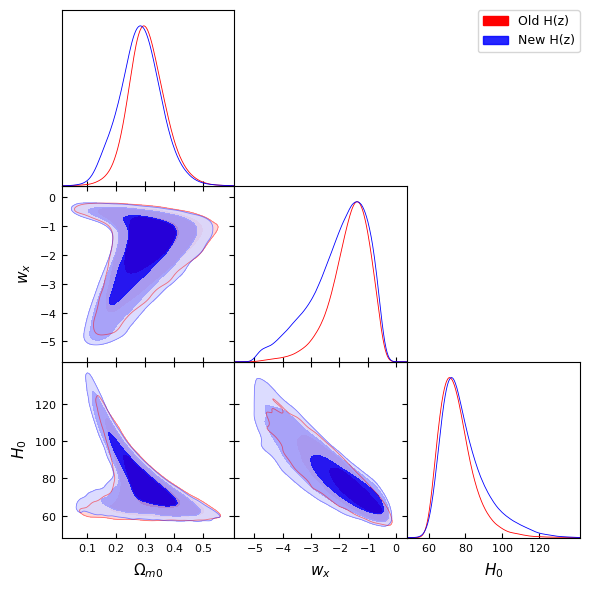

In [42]:
# Prepare OLD chain (Om0, H0)
H0_old = flat_samples_old[:, 0]
Obh2_old = flat_samples_old[:, 1]
Och2_old = flat_samples_old[:, 2]
wx_old = flat_samples_old[:, 3]
Ovh2 = 0.06 / 93.14
h_old = H0_old / 100.0
Om0_old = (Obh2_old + Och2_old + Ovh2) / h_old**2
plot_samples_old = np.vstack([Om0_old, wx_old, H0_old]).T

# Prepare NEW chain (Om0, H0)
H0_new = flat_samples_new[:, 0]
Obh2_new = flat_samples_new[:, 1]
Och2_new = flat_samples_new[:, 2]
wx_new = flat_samples_new[:, 3]
h_new = H0_new / 100.0
Om0_new = (Obh2_new + Och2_new + Ovh2) / h_new**2
plot_samples_new = np.vstack([Om0_new, wx_new, H0_new]).T

# Set up GetDist samples
names = ["om0", "wx", "H0"]
labels = [r"\Omega_{m0}", r"w_x", r"H_0"]
samples_getdist_old = MCSamples(samples=plot_samples_old, names=names, labels=labels)
samples_getdist_new = MCSamples(samples=plot_samples_new, names=names, labels=labels)

# Plot both contours
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot(
    [samples_getdist_old, samples_getdist_new],
    names=names,
    filled=True,
    legend_labels=['Old H(z)', 'New H(z)'],
    line_args=[{'color': 'red'}, {'color': 'blue'}],
    contour_colors=['red', 'blue']
)
plt.show()


In [54]:
# Print a formatted table with all statistics
print(samples_getdist_old.getTable(limit=1).tableTex())



\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{m0}    $} & $0.306^{+0.057}_{-0.066}   $\\

{\boldmath$w_x            $} & $-1.64^{+0.84}_{-0.43}     $\\

{\boldmath$H_0            $} & $75.4^{+5.4}_{-11}         $\\
\hline
\end{tabular}


In [55]:
# Print a formatted table with all statistics
print(samples_getdist_new.getTable(limit=1).tableTex())



\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{m0}    $} & $0.283\pm 0.073            $\\

{\boldmath$w_x            $} & $-1.98^{+1.3}_{-0.53}      $\\

{\boldmath$H_0            $} & $79.4^{+5.9}_{-15}         $\\
\hline
\end{tabular}
